### 예시1 모델 평가 개념

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
X, y = make_blobs(n_samples=1000,random_state=None) #데이터셋 생성.

In [32]:
#Training data(학습용)와 Test data(평가용)로 데이터를 나눈다.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

In [39]:
#예시 모델 logreg를 Training data에 적합시킨다.

In [40]:
logreg = LogisticRegression().fit(X_train, y_train)

In [41]:
#Test data를 통해 모델을 평가

In [42]:
logreg.score(X_test, y_test) #테스트 데이터에 적합시켰을 때 88%의 성공률을 보인다.

0.968

### Cross-validation (교차 검증)

In [9]:
#이전에 anaconda prompt 열고 pip install mglearn

In [43]:
import mglearn # 그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 이 책을 위해 만든 유틸리티 함수.

In [44]:
import matplotlib.pyplot as plt

C:\Users\Chankoo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:2669: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


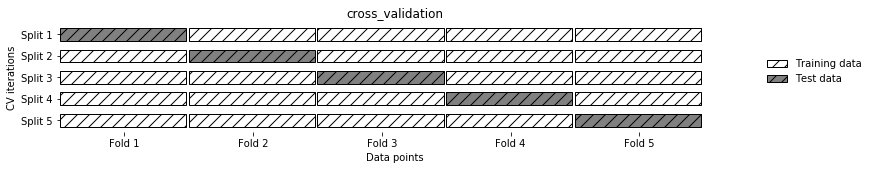

In [12]:
mglearn.plots.plot_cross_validation()
plt.show()

### Cross-validation in scikit-learn (교차 검증)

주어진 데이터를 쪼개어 일부는 학습을 시켜 모델을 만드는데 사용(traing data)하고,
일부는 모델을 검증(test data)하는데 사용하는 방법.

- 과적합을 피하기 위해서 사용한다. -> 예측을 위한 일반화(Generalization)를 목적으로

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [46]:
iris = load_iris()

In [48]:
logreg = LogisticRegression()

In [52]:
scores = cross_val_score(logreg, iris.data, iris.target) #cross_val_score의 매개 변수들은 평가하고자 하는 모델이다.

In [54]:
print("cross-validation scores: ", scores) 

cross-validation scores:  [0.96078431 0.92156863 0.95833333]


numpy.ndarray

In [56]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10) #cv를 이용하여 fold 수를 변경할 수 있다.

In [19]:
# fold가 5개이면 전체 데이터를 5개로 나눈 것.
# 보통 5나 10을 사용함.(10을 더 보편적으로 사용함.)

In [57]:
scores

array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.8       , 0.93333333, 1.        , 1.        ])

In [58]:
scores.mean() #교차 검증의 정확도를 보는 일반적인 방법은 평균을 계산하는 것이다.

0.9533333333333334

### Stratified K-Fold cross-validation and other strategies 

데이터의 첫번째 부분부터 시작하여 데이터 셋을 k-개로 분할하는 것은 항상 좋은 방법이 아닐 수 있다. -> 애초에 전체 데이터의 기본적인 속성을 알고 그에 따라 미리 분류해놓은 그룹을 정보로 층화하여 fold를 구성한다면 더 좋은 검증 방법이 될 것이다. 

In [59]:
from sklearn.datasets import load_iris

In [60]:
iris = load_iris()

In [61]:
print(iris.target) #이 데이터를 k값이 3이 되도록 설정한다면, test데이터는 오직 0만, training데이터는 1,2만 들어가게 될 수 있다.
#그렇게 되면 세 데이터가 모두 다르기 때문에, 모델의 성능 평가가 어렵다.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\Chankoo\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
C:\Users\Chankoo\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
C:\Users\Chankoo\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
C:\Users\Chankoo\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:163: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is depr

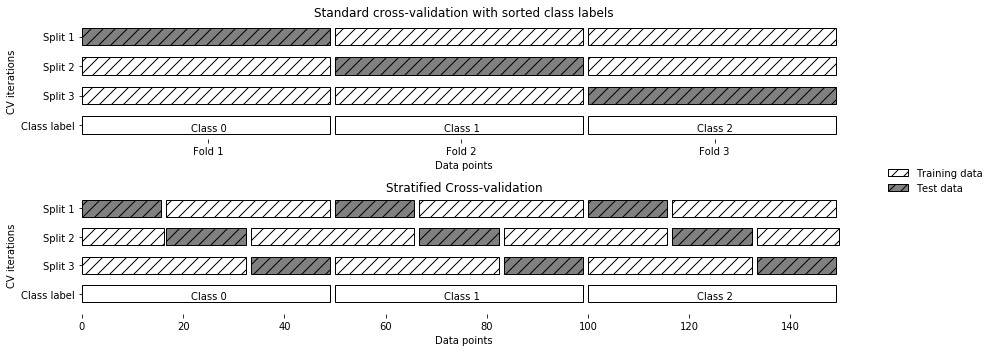

In [24]:
mglearn.plots.plot_stratified_cross_validation()
plt.show()

### More control over cross-validation

다른 사람의 결과를 재현하기 위해 데이터에 표준 k-fold cross-validation을 사용하고자 하는 경우.

In [62]:
from sklearn.model_selection import KFold

In [63]:
kfold5 = KFold(n_splits=5) #사용하고자 하는 fold 수

In [68]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold5) #cv에 kfold를 할당.

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [66]:
kfold3 = KFold(n_splits=3) # fold 수가 3이면 나쁘다는 것을 보여주는 예시

In [69]:
cross_val_score(logreg,iris.data,iris.target,cv=kfold3)

array([0., 0., 0.])

In [31]:
# 모두 0이 되는 문제를 해결하기 위한 다른 방법 중 하나는 데이터를 라벨별로 제거하기 위해 데이터를 삭제하는 것이다.

In [30]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In [31]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.9 , 0.96, 0.96])

### Leave-One-Out cross-validation

한개의 데이터를 Test set으로 만드는 방법.

In [34]:
from sklearn.model_selection import LeaveOneOut

In [35]:
loo = LeaveOneOut()

In [36]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

In [37]:
print("number of cv iterations: ", len(scores))

number of cv iterations:  150


In [38]:
print("mean accuracy: ", scores.mean())

mean accuracy:  0.953333333333


### Shuffle-Split cross-validation

학습용 데이터(train data)를 선택하는 방법 중 하나로 랜덤하게 선택하는 Shuffle 방법. 
- 이외에 데이터가 입력된 순서대로 선택하는 Linear, 타겟 변수에 대한 비율에 맞춰서 랜덤하게 선택하는 Stratified 방법이 있다.) 

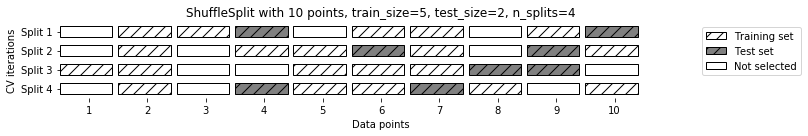

In [39]:
mglearn.plots.plot_shuffle_split()
plt.show()

In [40]:
from sklearn.model_selection import ShuffleSplit

In [41]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

In [42]:
cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

array([ 0.8       ,  0.94666667,  0.97333333,  0.90666667,  0.94666667,
        0.94666667,  0.89333333,  0.89333333,  0.96      ,  0.94666667])

### Cross-validation with groups

데이터가 밀접한 관련이 있는 그룹에 있을 때 사용하는 방법.


예시) 얼굴사진으로 감정을 인식하는 시스템 
- 일반적인 교차검증 방법을 사용하면 같은 사람의 사진이 Training과 Test에 있을 확률이 높기 때문에 새로운 얼굴에 대한 평가를 정확하게 하기 위해서, 우리는 Training과 Test가 서로 다른 사람들의 이미지를 포함하도록 해야 한다.

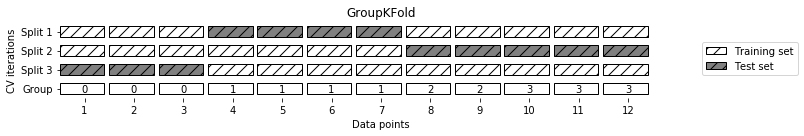

In [43]:
mglearn.plots.plot_group_kfold()
plt.show()

In [44]:
from sklearn.model_selection import GroupKFold

In [45]:
X, y = make_blobs(n_samples=12, random_state=0) #데이터셋 생성

In [46]:
labels = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] #0,1,2,3은 값 각각이 아니라 값이 가지고 있는 정보. 위의 예시에서 각 사람 이름. 

In [47]:
cross_val_score(logreg, X, y, labels, cv=GroupKFold(n_splits=3))

array([ 0.75      ,  0.8       ,  0.66666667])

## Grid Search

 - 모델의 성능을 최대로 높여주는 매개변수(모수) 값을 찾아야 한다.
 - Grid Search(그리드 서치) : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도

### 간단한 Grid Search

 1. 클래스 중 하나인 SVC에 구현된 RVF 커널 SVM을 사용함.*SVM = Support Vector Machine => 분류를 위한 머신러닝의 한 줄기. ‘서포트 벡터’ 간의 여백(margin)을 최대화하는 분류 모델.
 2. 여기서는 gamma와 규제 매개변수 C가 중요
 3. 매개변수 C와 gamma에 0.001, 0.01 , 0.1, 1, 10, 100을 적용 => 조합의 수 : 36 (가지)
 4. 이 모든 조합을 보기위해 grid를 만듬

In [48]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [49]:
iris = load_iris() # iris data
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0) 
print("training set의 크기: %d , test set의 크기: %d" % (
    X_train.shape[0], X_test.shape[0]))
# array.shape => array의 행과 열의 개수를 튜플로 반환

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:    
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:        
        # 매개변수 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)        
        # test set으로 SVC 평가
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도): ", best_score) 
print("최적 매개변수: ", best_parameters)

training set의 크기: 112 , test set의 크기: 38
최고 점수(모델 정확도):  0.973684210526
최적 매개변수:  {'C': 100, 'gamma': 0.001}


### 매개변수 과대적합(overfitting)의 위험성과 evaluation set(검증 세트)

 위 예시에서는 모델의 정확도가 97%임을 확인 할 수 있다. 하지만 이는 test set에 과대적합(overfitting)된 모델일 수 있다. 따라서 평각를 위해 모델을 만들 때 사용하지 않은 독립된 data set이 필요하다.
 
 이를 위해 data set을 
 1. training set   : 모델 만들기
 2. validation set : 모델의 매개변수(모수) 선택
 3. test set       : 선택된 매개변수(모수)의 성능 평가  
 
3개의 set으로 나눈다.

In [50]:
#anaconda prompt > "pip install mglearn"
import mglearn
import matplotlib.pyplot as plt

threefold_split


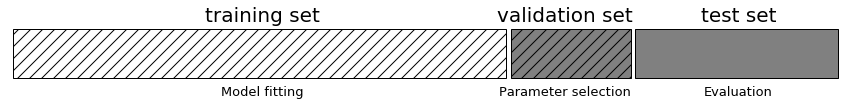

In [51]:
print("threefold_split")
mglearn.plots.plot_threefold_split()
plt.show()

In [52]:
# 전체 data set을 (training + validation), test 셋으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0) 
# (training+validation) set을 training, validation 셋로 나눔 
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: %d  , size of validation set: %d  , size of test set: %d" % (
    X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:    
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:        
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid)        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("validation set에서 최고 점수: ", best_score) 
print("최적 매개변수: ", best_parameters) 
print("최적 매개변수에서 test set의 점수(모델 정확도): ", test_score)

Size of training set: 84  , size of validation set: 28  , size of test set: 38
validation set에서 최고 점수:  0.964285714286
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 test set의 점수(모델 정확도):  0.921052631579


 validation set의 정확도는 약 96.4%으로 앞의 결과보다 약간 낮아짐. ( 데이터를 한번 더 나누기 때문에 X.train 이 더 작음 )  
 실제 봐야하는 모델 정확도는 이보다 더 작은 약 92.1%이다.

### 교차 검증을 이용한 grid search

  더 향상된 성능을 위해 단순히 training, validation set으로 나누는 것이 아니라 교차 검증(cross-validation)을 이용하여 매개변수간 결합을 평가한다.

In [53]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [54]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련         
        svm = SVC(gamma=gamma, C=C)
        # k = 5인 교차 검증 수행
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 구함
        score = np.mean(scores)
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma} 
# 구해진 최적 매개변수를 가지고 training set과 validation set을 합쳐서 다시 모델을 만든다.
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 k = 5인 교차검정으로 C와 gamma(각각 6개의 후보 변수)에 대한 SVM 정확도를 평가하려면 36*5 = 180개의 모델을 만들어야 하기 때문에 이 모델들을 모두 학습시키는데 시간이 오래 소요된다는 단점이 있다.

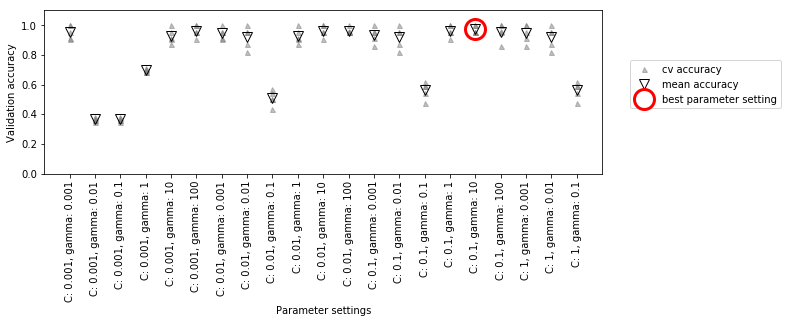

In [55]:
mglearn.plots.plot_cross_val_selection()
plt.show()

매개변수 선택에 따라서 k = 5에 따른 모델 정확도가 어떤지, 최적 매개변수 조합은 무엇인지 시각화 함
( 일부만 나타남, 전체 나타나게 하는 코드 x)

교차 검증을 이용한 grid serach는 많이 사용되므로 scikit-learn은 이를 사용 할 수 있는 **GirdSearchCV**를 이용한다.
- 이 class를 이용하기 위해 dictionary를 이용서 매개변수를 지정해야 한다.
- key는 매개변수의 이름( ex. 'gamma', 'C') , value는 검증하고 싶은 매개변수 값(0.001, 0.01, ..., 1, 10) 이다.

In [56]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} 
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

매개변수가 param_grid의 key인 k=5인 교차검증을 GridSearchCV를 적용한다.

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.svm import SVC 
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0) 
grid_search.fit(X_train, y_train)

print("최적 매개변수 : ",grid_search.best_params_) 
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

최적 매개변수 :  {'C': 100, 'gamma': 0.01}
최상 교차검증 점수 :  0.973214285714
최고 성능 모델 :  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 교차검증 분석하기

 교차 검증의 결과를 시각화하면 매개변수가 모델의 일반화(generalizing)에 얼마나 영향을 주는지 이해할 수 있다. grid search는 연산 비용이 크므로 적은 수의 grid에서 결과를 분석하여 검색을 확장하여 나간다. 
  상세 정보가 많이 들어가므로 DataFrame(by pandas)으로 변환하여 보는 것이 좋다.

In [59]:
import pandas as pd
from IPython.display import display 

In [60]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001201,0.000200,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.001861e-04,0.000400,0.011371,0.002852
1,0.001000,0.000400,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,1.061967e-06,0.000490,0.011371,0.002852
2,0.001004,0.000801,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,7.742696e-06,0.000400,0.011371,0.002852
3,0.000000,0.000800,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000000e+00,0.000400,0.011371,0.002852
4,0.001206,0.000200,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.001321e-04,0.000401,0.011371,0.002852
5,0.001001,0.000200,0.366071,0.366079,0.001,100,"{'C': 0.001, 'gamma': 100}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,9.702201e-07,0.000400,0.011371,0.002852
6,0.000605,0.000602,0.366071,0.366079,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.939594e-04,0.000492,0.011371,0.002852
7,0.000601,0.000200,0.366071,0.366079,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.904465e-04,0.000400,0.011371,0.002852
8,0.001001,0.000000,0.366071,0.366079,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,1.784161e-07,0.000000,0.011371,0.002852
9,0.001001,0.000000,0.366071,0.366079,0.01,1,"{'C': 0.01, 'gamma': 1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,6.843901e-07,0.000000,0.011371,0.002852


2차원의 매개변수 grid를 가지므로 히트맵(heat map)을 이용하여 시각화 한다. x축에 'gamma', y축에 'C', 각 격자안에 교차 검정의 평균값을 입력한다.

C:\Users\YUNJIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


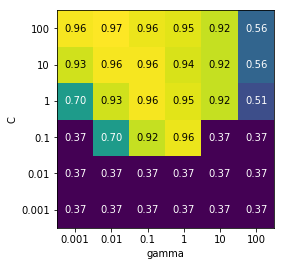

In [61]:
scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

# plot the mean cross-validation scores 
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', 
                      xticklabels=param_grid['gamma'], yticklabels=param_grid['C'],
                      cmap="viridis")
plt.show() # 버젼이 낮으면 오류가 뜰 수 있음

 히트맵 결과를 통해서 SVC가 매개변수 선택에 따라 얼마나 민감한 지를 확인할 수 있다. 또한 우리가 선택한 매개변수 조합들의 범위가 적절했고 적당히 컸기 때문에 낮은 정확도부터 높은 정확도까지 모두 확인할 수 있었다.
 아래는 매개변수 조합을 잘못 선정했을 때의 결과를 보여주는 히트맵.

C:\Users\YUNJIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\YUNJIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\YUNJIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


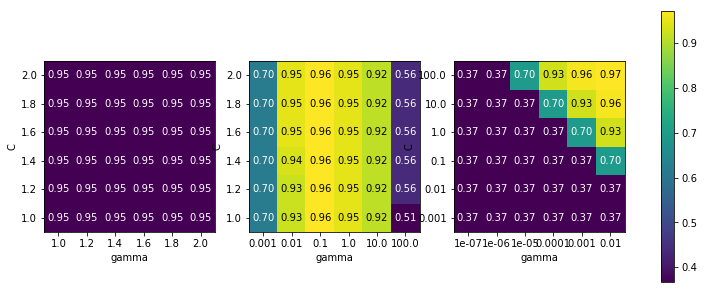

gridsearch_failures


In [62]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):    
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)    
    grid_search.fit(X_train, y_train)    
    scores = [score.mean_validation_score for score in grid_search.grid_scores_]
    scores = np.array(scores).reshape(6, 6)
    
    # plot the mean cross-validation scores    
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', 
                                         xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], cmap="viridis",
                                         ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()
print("gridsearch_failures")


1번 heatmap : 점수 변화가 없음
- C와 gamma의 범위가 적절하지 않음 or C와 gamma가 중요하지않은 매개변수  

2번 heatmap : 세로로 색이 나타남
- gamma는 적절한 범위를 가짐
- C는 영향을 주지 않은 매개변수 or C의 범위가 적절하지 않음  

3번 heatmap : C와 gamma에 따라 값이 변화
- C의 아래쪽 범위에서 변화가 없으므로 C 범위에 있는 값들을 높여 주면 좋음

training set과 validation set으로 1번만 분할하려면 n_splits = 1로하고 ShuffleSplit, StratifiedShuffleSplit을 사용한다. 주로 data set이 크거나 모델 구축에 시간이 오래 걸릴 때 사용한다.

### Nested cross-validation(중접 교차 검증)

 처음에 데이터를 training, test data로 나눈 후 training set로 grid search를 한다. 이는 grid search를 통해 찾은 최적의 매개변수가 모델을 얼마나 잘 일반화 시켰는지 알려준다.

In [63]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), 
                         iris.data, iris.target, cv=5) 
print("교차 검증 점수: ", scores) 
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
교차 검증 평균 점수:  0.98


 = SVC는 iris 데이터 셋에서 평균 교차 검증 정확도가 98%다.  
 
 이 방법은 k-겹 교차 검증을 2번 사용하므로(36 X 5 X 5 = 900) 시간이 많이걸리고 비싸다.

In [64]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from mglearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import roc_curve

C:\Users\YUNJIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
# train/test set 나누기 
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

## 모델 별로 score값 계산하기
#### (accuracy와 비슷한 개념. training set을 통해 만들어진 모델로 test set에서 얼마나 맞추는지...) 
#### 이번 단원은 구체적인 classifier를 이해하기 보다는, 다양한 모델들의 score값을 계산하는 것에 초점을 맞춥니다.

In [66]:
# Dummy classifier (Training set의 분포를 기준으로 분류하는 방법)
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: %f" % dummy.score(X_test, y_test)) 

dummy score: 0.826667


In [67]:
# Decisiontree (information gain등 일정 지표를 통해 training set을 특징별로 나눠가는 것, 28일 세션에 배움:D)
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
tree.score(X_test, y_test) # accyracy: 91.78% (good!)

0.9177777777777778

In [68]:
# Logistic regression (이미 배웠음!)
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: %f" % logreg.score(X_test, y_test)) # (goood!)

logreg score: 0.977778


## Confusion matrix, F1 score 계산하기

In [69]:
# logistic regression 모델의 confusion matrix
confusion = confusion_matrix(y_test, pred_logreg) 
print(confusion)

[[401   2]
 [  8  39]]


In [70]:
# confusion matrix의 값들을 이용한 3가지 모델의 f1 score값 비교
# precision = tp/(tp+fp) :내모델이 1이라고 예측한 애들 중에서, 실제로도 1인 애의 비율... 
# recall = tp/(tp+fn) :실제 1인애들 중에서, 내 모델로도 1이라고 잘 맞춘 비율...
# 보통 precision과 recall은 반비례 관계라 중간 타협 지점을 잘 찾아서 model을 구성해야함
# F1 score = (2*precision*recall)/(precision+recall)
# 어쨌든 f1 score값은 높을수록, 좋은 모델이라고 할 수 있음 
print("f1 score dummy: %.2f" % f1_score(y_test, pred_dummy))
print("f1 score tree: %.2f" % f1_score(y_test, pred_tree))
print("f1 score logistic: %.2f" % f1_score(y_test, pred_logreg))

f1 score dummy: 0.06
f1 score tree: 0.55
f1 score logistic: 0.89


In [71]:
# 방금 구했던 precision, recall, f1-score는 report함수를 이용하여 예쁘게 보기도 가능...
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



## ROC curve

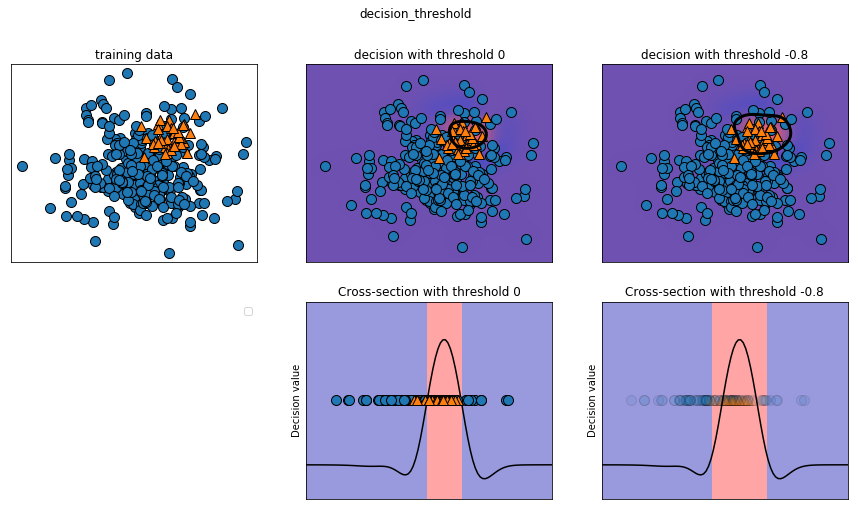

In [72]:
# SVM 알고리즘 이용 (support vector machine은 11/9 세션에 자세히...)
# 파란동그라미: negative class
# 주황세모: positive class
# 경계값(threshold) 0~1 
# threshold값이 0에 가까우면 더 보수적으로 positive를 잡아냄 (precision값 큼)
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
mglearn.plots.plot_decision_threshold()
plt.show()

In [73]:
# threshold 값에 따른 precision, recall값 비교

# 보수적인 애 (threshold 값이 0에 가까움)
print(classification_report(y_test, svc.predict(X_test)))

# 덜 보수적인 애 (threshold 값이 1에 가까움)
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

# 결과를 보면 0에 대한 precision 값이 높아지면 1에 대한 precision 값이 떨어지고
# 마찬가지로 0에 대한 recall 값이 낮아지면 1에 대한 recall 값이 높아지는 등
# threshold에 따라 precision, recall은 반비례관계... 적절한 타협점 필요!

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



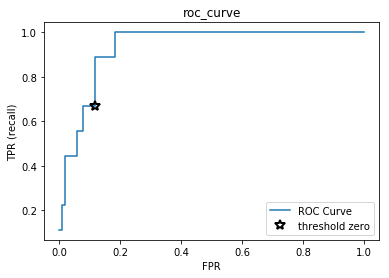

In [74]:
# ROC curve
# x축은 false positive rate (=fp/(fp+tn)) 값, y축은 true positive rate (=recall) 값
# 어쨌든 x 값은 작을수록, y값은 클수록 좋음
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test)) # 실제 y와 예측된 y로 fpr, tpr, threshold 계산
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.title("roc_curve");

close_zero = np.argmin(np.abs(thresholds)) # threshold의 절댓값이 작은 index를 체크해봄
plt.plot(fpr[close_zero], tpr[close_zero], '*', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()
# threshold를 별표인 곳으로 잡으면... recall은 0.7 정도, fpr은 0.1 정도로 타협 본 모델로 택하는 것

### 감사합니다. : )

## Reference:
### Introduction machine learning with python by Andreas C. Mueller and Sarah Guido, Chapter 6